In [151]:
import pandas as pd
farmworkers_df = pd.read_csv('../data/processed/farmworkers_condensed.csv')

In [152]:
farmworkers_df

,State,Year,Month,Region,TotalHiredSeasonal,Mexican,HiredWorkers,Local,Intrastate,Interstate,TotalForeign
0,AL,1947,7.0,6.0,NaN,NaN,207000.0,NaN,NaN,NaN,NaN
1,AL,1963,9.0,6.0,21980.0,0.0,NaN,21830.0,150.0,0.0,0.0
2,AL,1945,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,370.0
3,AL,1972,4.0,6.0,NaN,NaN,81000.0,NaN,NaN,NaN,NaN
4,AL,1964,10.0,6.0,16195.0,0.0,295000.0,16159.0,0.0,36.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
15826,WY,1961,7.0,8.0,3912.0,148.0,177000.0,1720.0,335.0,1709.0,148.0
15827,WY,1960,10.0,8.0,1625.0,0.0,173000.0,1085.0,230.0,310.0,0.0
15828,WY,1943,6.0,8.0,NaN,300.0,NaN,NaN,NaN,NaN,NaN
15829,WY,1960,9.0,8.0,1682.0,0.0,NaN,1183.0,234.0,265.0,0.0


In [153]:
farmworkers_df['MexicanPercent'] = (farmworkers_df['Mexican']/farmworkers_df['HiredWorkers'])*100

In [154]:
farmworkers_df.sample(10)

,State,Year,Month,Region,TotalHiredSeasonal,Mexican,HiredWorkers,Local,Intrastate,Interstate,TotalForeign,MexicanPercent
12068,RI,1974,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13149,TN,1970,8.0,6.0,NaN,NaN,NaN,28100.0,20.0,82.0,NaN,NaN
4150,IA,1968,12.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15749,WY,1947,12.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5272,LA,1969,3.0,7.0,700.0,NaN,NaN,700.0,NaN,NaN,0.0,NaN
10278,ND,1956,4.0,4.0,3976.0,0.0,112000.0,2075.0,706.0,1195.0,0.0,0.0
6630,MI,1942,10.0,3.0,NaN,NaN,305000.0,NaN,NaN,NaN,NaN,NaN
6973,MN,1963,12.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6957,MN,1969,9.0,4.0,3385.0,NaN,NaN,3269.0,25.0,91.0,0.0,NaN
11167,OK,1962,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
farmworkers_df['MexicanPercent'].isna().value_counts()

MexicanPercent
True     14086
False     1745
Name: count, dtype: int64

In [156]:
mexican_df = farmworkers_df[farmworkers_df['MexicanPercent'].notna()]

In [157]:
mexican_df.sample(10)

,State,Year,Month,Region,TotalHiredSeasonal,Mexican,HiredWorkers,Local,Intrastate,Interstate,TotalForeign,MexicanPercent
8006,NE,1955,4.0,4.0,2.0,2.0,108000.0,0.0,0.0,0.0,2.0,0.001852
13207,TX,1959,10.0,7.0,342975.0,136734.0,659000.0,131961.0,67600.0,6625.0,136789.0,20.748710
5406,ME,1957,10.0,1.0,2491.0,0.0,83000.0,1734.0,0.0,0.0,235.0,0.000000
3713,IN,1944,7.0,3.0,NaN,60.0,313000.0,NaN,NaN,NaN,NaN,0.019169
8659,NH,1964,7.0,1.0,1250.0,0.0,51000.0,1180.0,0.0,70.0,0.0,0.000000
9816,NY,1947,7.0,2.0,NaN,193.0,287000.0,NaN,NaN,NaN,1388.0,0.067247
3233,ID,1959,7.0,8.0,9670.0,0.0,187000.0,5805.0,755.0,3110.0,0.0,0.000000
1462,CO,1964,7.0,8.0,14056.0,2608.0,154000.0,6567.0,805.0,4076.0,2608.0,1.693506
1322,CA,1953,1.0,9.0,NaN,17300.0,122000.0,85300.0,NaN,NaN,NaN,14.180328
9126,NJ,1959,10.0,2.0,13685.0,0.0,168000.0,5343.0,40.0,3375.0,787.0,0.000000


In [158]:
mexican_df = mexican_df[mexican_df['MexicanPercent'] > 0]
mexican_df = mexican_df[mexican_df['Year'] >= 1943]
mexican_df = mexican_df[mexican_df['Year'] <= 1967]
mexican_df

,State,Year,Month,Region,TotalHiredSeasonal,Mexican,HiredWorkers,Local,Intrastate,Interstate,TotalForeign,MexicanPercent
328,AZ,1946,10.0,8.0,NaN,909.0,159000.0,NaN,NaN,NaN,909.0,0.571698
329,AZ,1957,7.0,8.0,17457.0,3698.0,186000.0,10603.0,619.0,1445.0,3698.0,1.988172
330,AZ,1952,1.0,8.0,NaN,4700.0,62000.0,16200.0,NaN,NaN,NaN,7.580645
338,AZ,1947,7.0,8.0,NaN,727.0,182000.0,NaN,NaN,NaN,727.0,0.399451
339,AZ,1961,10.0,8.0,26444.0,10859.0,165000.0,12316.0,1280.0,1989.0,10859.0,6.581212
...,...,...,...,...,...,...,...,...,...,...,...,...
15772,WY,1964,7.0,8.0,3782.0,390.0,154000.0,2159.0,75.0,1158.0,390.0,0.253247
15796,WY,1945,1.0,8.0,NaN,7.0,84000.0,NaN,NaN,NaN,NaN,0.008333
15808,WY,1944,7.0,8.0,NaN,1026.0,175000.0,NaN,NaN,NaN,NaN,0.586286
15817,WY,1957,7.0,8.0,5555.0,1004.0,186000.0,2269.0,386.0,1871.0,1004.0,0.539785


In [159]:
farmworkers_df['MexicanPercentSeasonal'] = (farmworkers_df['Mexican']/farmworkers_df['TotalHiredSeasonal'])*100
farmworkers_df.sample(10)

,State,Year,Month,Region,TotalHiredSeasonal,Mexican,HiredWorkers,Local,Intrastate,Interstate,TotalForeign,MexicanPercent,MexicanPercentSeasonal
12711,SD,1944,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8988,NJ,1965,9.0,2.0,16115.0,0.0,NaN,7185.0,95.0,8835.0,0.0,NaN,0.000000
13495,TX,1969,1.0,7.0,56235.0,NaN,90000.0,56115.0,120.0,NaN,0.0,NaN,NaN
4224,IA,1960,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10440,ND,1961,11.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5992,MD,1964,1.0,5.0,NaN,NaN,185000.0,NaN,NaN,NaN,NaN,NaN,NaN
9900,NY,1960,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5403,ME,1960,6.0,1.0,7847.0,0.0,NaN,7572.0,0.0,0.0,237.0,NaN,0.000000
2412,FL,1969,7.0,5.0,NaN,NaN,319000.0,28395.0,620.0,1325.0,NaN,NaN,NaN
2884,GA,1961,10.0,5.0,40645.0,775.0,430000.0,39784.0,86.0,0.0,775.0,0.180233,1.906754


In [160]:
mexican_seasonal = farmworkers_df[farmworkers_df['MexicanPercentSeasonal'].notna()]

In [161]:
mexican_seasonal = mexican_seasonal[mexican_seasonal['MexicanPercentSeasonal'] > 0]
mexican_seasonal = mexican_seasonal[mexican_seasonal['Year'] >= 1953]
mexican_seasonal = mexican_seasonal[mexican_seasonal['Year'] <= 1967]
mexican_seasonal.sort_values(by='Year')

,State,Year,Month,Region,TotalHiredSeasonal,Mexican,HiredWorkers,Local,Intrastate,Interstate,TotalForeign,MexicanPercent,MexicanPercentSeasonal
6876,MN,1953,9.0,4.0,15906.0,165.0,NaN,10503.0,628.0,600.0,213.0,NaN,1.037344
14584,WA,1953,8.0,9.0,41950.0,388.0,NaN,27027.0,3350.0,4414.0,388.0,NaN,0.924911
1140,CA,1953,4.0,9.0,119000.0,21100.0,157000.0,73500.0,19000.0,5400.0,NaN,13.439490,17.731092
14588,WA,1953,4.0,9.0,10859.0,17.0,157000.0,7629.0,1140.0,2073.0,NaN,0.010828,0.156552
14600,WA,1953,7.0,9.0,53919.0,1700.0,320000.0,NaN,NaN,NaN,NaN,0.531250,3.152877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,CA,1966,11.0,9.0,90650.0,660.0,NaN,72700.0,11470.0,5820.0,660.0,NaN,0.728075
1371,CA,1966,10.0,9.0,149300.0,4430.0,318000.0,109520.0,24250.0,11100.0,4430.0,1.393082,2.967180
1302,CA,1966,6.0,9.0,151350.0,660.0,NaN,109250.0,25200.0,16100.0,800.0,NaN,0.436075
1389,CA,1966,9.0,9.0,179850.0,7760.0,NaN,114200.0,35600.0,22200.0,7850.0,NaN,4.314707


In [194]:
mexican_year = mexican_df.groupby(['State', 'Year'])['MexicanPercent'].mean().reset_index()
mexican_year

,State,Year,MexicanPercent
0,AR,1951,3.276267
1,AR,1952,2.062253
2,AR,1953,2.511572
3,AR,1954,2.092358
4,AR,1955,2.828946
...,...,...,...
360,WY,1960,0.048066
361,WY,1961,0.083616
362,WY,1962,0.070520
363,WY,1963,0.068263


In [206]:
seasonal_year = mexican_seasonal.groupby(['State', 'Year'])['MexicanPercentSeasonal'].mean().reset_index()
seasonal_year

,State,Year,MexicanPercentSeasonal
0,AR,1953,12.214397
1,AR,1954,8.628393
2,AR,1955,9.153815
3,AR,1956,15.315258
4,AR,1957,12.613804
...,...,...,...
284,WY,1960,7.269720
285,WY,1961,9.245460
286,WY,1962,7.972492
287,WY,1963,11.630655


In [190]:
mexican_df['State'].value_counts()

State
CA    76
AZ    65
MI    40
CO    39
WI    35
UT    35
NM    33
NE    33
IN    32
WY    31
TX    30
MT    30
NV    30
MN    28
AR    28
WA    27
KS    27
OR    26
ID    23
SD    23
IL    18
IA    16
TN    15
ND    11
MO     9
KY     9
GA     7
OH     2
LA     2
NC     1
NH     1
NY     1
Name: count, dtype: int64

<Axes: xlabel='State,Year'>

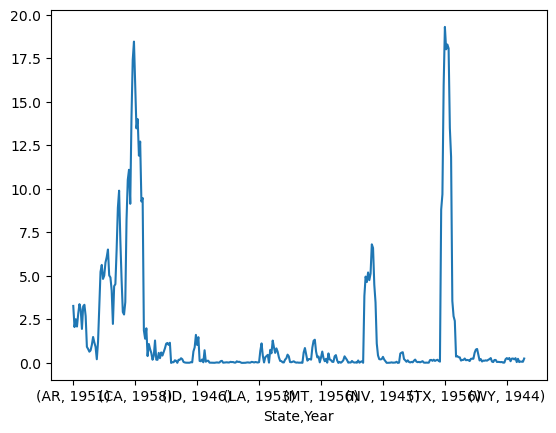

In [186]:
mexican_year.plot()

In [180]:
import plotly.express as px

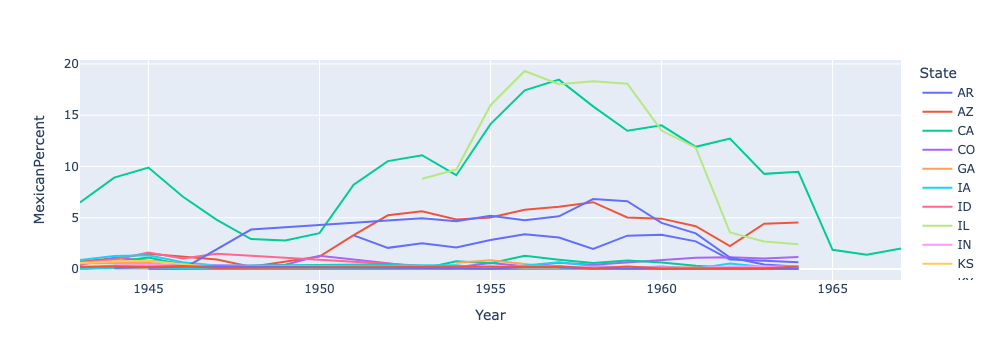

In [202]:
fig = px.line(mexican_year, x='Year', y='MexicanPercent', color='State')
fig.show()

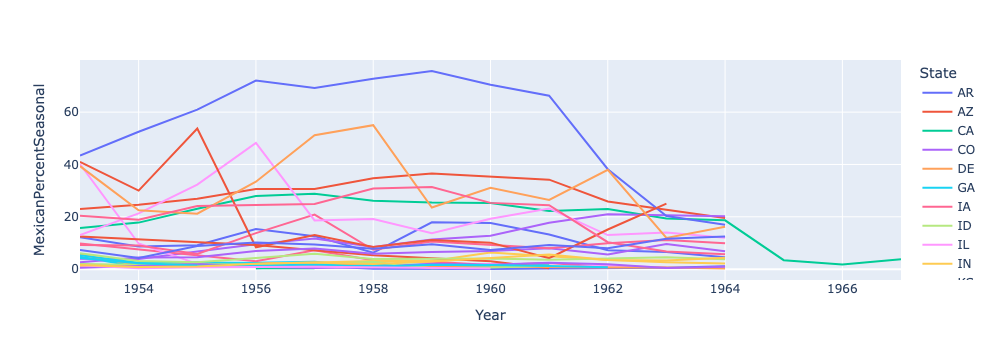

In [208]:
fig2 = px.line(seasonal_year, x='Year', y='MexicanPercentSeasonal', color='State')
fig2.show()